© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/Fig2_synthetic_data.pdf'


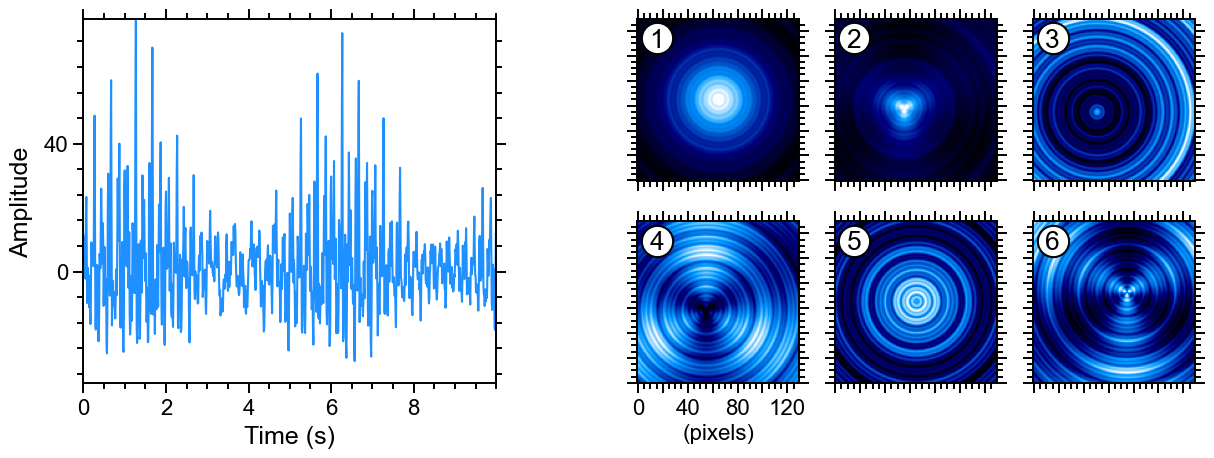

In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from astropy.io import fits # type: ignore
from matplotlib.ticker import AutoMinorLocator # type: ignore
from matplotlib.colors import ListedColormap # type: ignore
from WaLSAtools import WaLSA_save_pdf, WaLSA_histo_opt # type: ignore

#--------------------------------------------------------------------------

# Load synthetic data
data_dir = 'Synthetic_Data/'
hdul = fits.open(data_dir + 'NRMP_signal_1D.fits')
signal_1d = hdul[0].data  # 1D synthetic signal data
time = hdul[1].data  # Time array saved in the second HDU (Extension HDU 1)
hdul.close()

hdul = fits.open(data_dir + 'NRMP_signal_3D.fits')
signal_3d = hdul[0].data  # 3D synthetic signal data
hdul.close()

# Setting global parameters
plt.rcParams.update({
    'font.family': 'sans-serif',     # Use sans-serif fonts
    'font.sans-serif': 'Arial',   # Set Helvetica as the default sans-serif font
    'font.size': 18,          # Global font size
    'axes.titlesize': 18,     # Title font size
    'axes.labelsize': 16,     # Axis label font size
    'xtick.labelsize': 16,    # X-axis tick label font size
    'ytick.labelsize': 16,    # Y-axis tick label font size
    'legend.fontsize': 15,    # Legend font size
    'figure.titlesize': 18,   # Figure title font size
    'axes.grid': False,        # Turn on grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
    'font.weight': 500,      # Make all fonts bold
    'axes.titleweight': 500, # Make title font bold
    'axes.labelweight': 500 # Make axis labels bold
})

plt.rc('axes', linewidth=1.4)
plt.rc('lines', linewidth=1.5)

# Set up the figure layout
fig = plt.figure(figsize=(12, 4.5))

# Left side: 1D signal plot spanning the entire vertical space
ax1d = fig.add_axes([0.063, 0.15, 0.344, 0.81])  # [left, bottom, width, height]
ax1d.plot(time, signal_1d * 10, color='dodgerblue')
ax1d.set_xlabel('Time (s)', fontsize=18, labelpad=5)
ax1d.set_ylabel('Amplitude', fontsize=18, labelpad=8)
ax1d.set_ylim(-35, 79)
ax1d.set_xlim([0, 10])
# Set tick marks outside for all four axes
ax1d.tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
ax1d.set_xticks(np.arange(0, 10, 2))
ax1d.set_yticks(np.arange(0, 80, 40))
# Custom tick sizes and thickness
ax1d.tick_params(axis='both', which='major', length=7, width=1.4)  # Major ticks
ax1d.tick_params(axis='both', which='minor', length=4, width=1.4)  # Minor ticks
# Set minor ticks
ax1d.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1d.yaxis.set_minor_locator(AutoMinorLocator(5))

# Right side: 6 subplots of the 3D datacube in a 2x3 grid
positions = [
    [0.493, 0.60, 0.198, 0.36], [0.6575, 0.60, 0.198, 0.36], [0.823, 0.60, 0.198, 0.36],  # Top row
    [0.493, 0.15, 0.198, 0.36], [0.6575, 0.15, 0.198, 0.36], [0.823, 0.15, 0.198, 0.36]   # Bottom row
]

# Define visualization parameters
xticks_labels = ['0', ' ', '40', ' ', '80', ' ', '120']

#--------------------------------------------------------------------------
# Load the RGB values from the IDL file, corresponding to IDL's "loadct, 1" color table
rgb_values = np.loadtxt('Color_Tables/idl_colormap_1.txt')
# Normalize the RGB values to [0, 1] (matplotlib expects RGB values in this range)
rgb_values = rgb_values / 255.0
idl_colormap_1 = ListedColormap(rgb_values)
custom_cmap = plt.get_cmap(idl_colormap_1)
#--------------------------------------------------------------------------

# Plot the six snapshots
for i in range(6):
    im = signal_3d[i, :, :]
    ax = fig.add_axes(positions[i])  # Create each subplot in specified position
    ax.imshow(WaLSA_histo_opt(im), cmap=custom_cmap, aspect='equal', origin='lower')

    # Configure axis ticks and labels
    ax.tick_params(axis='both', which='both', direction='out', top=True, right=True)
    ax.set_xticks(np.arange(0, 130, 20))
    ax.set_yticks(np.arange(0, 130, 20))
    ax.tick_params(axis='both', which='major', length=7, width=1.4)  # Major ticks
    ax.tick_params(axis='both', which='minor', length=4, width=1.4)  # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))

    # Show x-axis labels only for the 4th subplot
    if i == 3:
        ax.set_xlabel('(pixels)')
        ax.set_xticklabels(xticks_labels)
    else:
        ax.set_xticklabels([])
    
    ax.set_yticklabels([])  # Hide y-axis labels for all subplots
    
    # Plot specific markers and labels
    ax.plot(15, 114, 'o', color='black', markersize=23)
    ax.plot(15, 114, 'o', color='white', markersize=20)
    ax.text(15, 107, str(i + 1), fontsize=19, ha='center', color='black', fontweight=500)

#--------------------------------------------------------------------------

# Save the figure as a single PDF
pdf_path = 'Figures/Fig2_synthetic_data.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()